In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
min(len(w) for w in words), max(len(w) for w in words)

(2, 15)

In [5]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)} # chars lookup table 
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [6]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [7]:
xs

tensor([ 0,  5, 13, 13,  1])

In [8]:
ys

tensor([ 5, 13, 13,  1,  0])

In [9]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

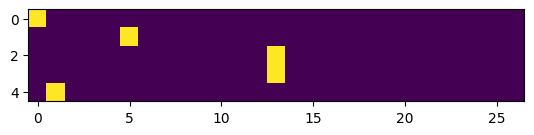

In [10]:
plt.imshow(xenc)

In [ ]:
W = torch.randn(27, 1) # for single neuron
W

tensor([[ 0.2639],
        [-1.0962],
        [ 0.0488],
        [ 1.5280],
        [ 0.9428],
        [ 1.4663],
        [ 0.0930],
        [ 0.6161],
        [-0.1599],
        [-0.3138],
        [-1.9789],
        [ 0.6742],
        [ 0.9777],
        [-1.2340],
        [ 1.6835],
        [ 0.7286],
        [ 0.4532],
        [ 0.2955],
        [-0.8952],
        [-0.3558],
        [-0.6962],
        [ 1.4437],
        [ 0.3605],
        [ 0.0684],
        [-0.8639],
        [-0.9496],
        [ 0.9320]])

In [ ]:
xenc @ W # (5, 27) @ (27, 1) all the 5 inputs to a single neuron give 5 outputs

tensor([[ 0.2639],
        [ 1.4663],
        [-1.2340],
        [-1.2340],
        [-1.0962]])

In [ ]:
W = torch.randn(27, 27) # 27 neurons
xenc @ W # (5, 27) @ (27, 27) --> (5, 27)

tensor([[ 1.5009, -1.0749,  0.3621, -0.2274, -0.5257,  0.5697,  1.6048, -0.4791,
          0.7015, -1.4450, -0.2986, -0.5871, -2.4313, -0.7902,  1.8175,  0.4611,
          0.1552, -0.2877, -0.9993,  0.8712, -0.5104, -2.9654, -0.2875,  0.1584,
          0.5875, -1.5110, -0.9658],
        [-0.8710,  0.2712,  0.9443,  0.3071, -1.6876,  0.3403, -1.8503, -0.0229,
         -2.5632, -0.4480, -1.0621, -1.1363,  1.1259, -1.7196,  0.0290,  0.8072,
          0.2782,  0.2518, -0.2583, -0.3411, -0.5437,  0.2915, -0.2630, -1.7232,
          1.7657, -0.4456, -1.0595],
        [ 0.8710, -0.4420, -1.2965, -1.4392,  0.6664,  1.0814,  1.0295,  1.2525,
         -0.1408, -1.5465,  1.3976,  0.5024,  0.2607,  0.3799, -0.5443, -0.5691,
         -1.1446, -1.1246, -0.5990,  0.3305, -0.6517,  1.1820,  0.4749,  0.5346,
          0.8300, -0.1793,  0.2459],
        [ 0.8710, -0.4420, -1.2965, -1.4392,  0.6664,  1.0814,  1.0295,  1.2525,
         -0.1408, -1.5465,  1.3976,  0.5024,  0.2607,  0.3799, -0.5443, -0.5691

In [ ]:
(xenc @ W)[3, 12] # firing of 12th neuron looking at 3rd input

tensor(0.2607)

In [28]:
logits = (xenc @ W) # log-counts
counts = logits.exp() # somehting that is equivalent to counts in original plot of next char prediction
print(counts)
prob = counts / counts.sum(1, keepdims=True) # normalize the counts/rows
prob

tensor([[4.4859, 0.3413, 1.4364, 0.7966, 0.5912, 1.7677, 4.9770, 0.6193, 2.0168,
         0.2357, 0.7418, 0.5559, 0.0879, 0.4538, 6.1567, 1.5859, 1.1679, 0.7500,
         0.3681, 2.3898, 0.6002, 0.0515, 0.7501, 1.1717, 1.7995, 0.2207, 0.3807],
        [0.4185, 1.3115, 2.5710, 1.3595, 0.1850, 1.4054, 0.1572, 0.9774, 0.0771,
         0.6389, 0.3457, 0.3210, 3.0831, 0.1791, 1.0295, 2.2416, 1.3208, 1.2863,
         0.7724, 0.7110, 0.5806, 1.3384, 0.7688, 0.1785, 5.8454, 0.6405, 0.3466],
        [2.3894, 0.6427, 0.2735, 0.2371, 1.9472, 2.9488, 2.7998, 3.4992, 0.8687,
         0.2130, 4.0453, 1.6527, 1.2978, 1.4621, 0.5802, 0.5660, 0.3183, 0.3248,
         0.5494, 1.3916, 0.5211, 3.2608, 1.6079, 1.7067, 2.2933, 0.8359, 1.2788],
        [2.3894, 0.6427, 0.2735, 0.2371, 1.9472, 2.9488, 2.7998, 3.4992, 0.8687,
         0.2130, 4.0453, 1.6527, 1.2978, 1.4621, 0.5802, 0.5660, 0.3183, 0.3248,
         0.5494, 1.3916, 0.5211, 3.2608, 1.6079, 1.7067, 2.2933, 0.8359, 1.2788],
        [0.6684, 1.6495,

tensor([[0.1229, 0.0094, 0.0394, 0.0218, 0.0162, 0.0484, 0.1364, 0.0170, 0.0553,
         0.0065, 0.0203, 0.0152, 0.0024, 0.0124, 0.1687, 0.0434, 0.0320, 0.0205,
         0.0101, 0.0655, 0.0164, 0.0014, 0.0206, 0.0321, 0.0493, 0.0060, 0.0104],
        [0.0139, 0.0436, 0.0854, 0.0452, 0.0061, 0.0467, 0.0052, 0.0325, 0.0026,
         0.0212, 0.0115, 0.0107, 0.1025, 0.0060, 0.0342, 0.0745, 0.0439, 0.0427,
         0.0257, 0.0236, 0.0193, 0.0445, 0.0255, 0.0059, 0.1943, 0.0213, 0.0115],
        [0.0605, 0.0163, 0.0069, 0.0060, 0.0493, 0.0746, 0.0709, 0.0886, 0.0220,
         0.0054, 0.1024, 0.0418, 0.0328, 0.0370, 0.0147, 0.0143, 0.0081, 0.0082,
         0.0139, 0.0352, 0.0132, 0.0825, 0.0407, 0.0432, 0.0580, 0.0212, 0.0324],
        [0.0605, 0.0163, 0.0069, 0.0060, 0.0493, 0.0746, 0.0709, 0.0886, 0.0220,
         0.0054, 0.1024, 0.0418, 0.0328, 0.0370, 0.0147, 0.0143, 0.0081, 0.0082,
         0.0139, 0.0352, 0.0132, 0.0825, 0.0407, 0.0432, 0.0580, 0.0212, 0.0324],
        [0.0137, 0.0338,

In [ ]:
##-------------- SUMMARY---------- ##
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [30]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [34]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
prob.shape

torch.Size([5, 27])

In [ ]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())
## The big deal here is we have loss function and the loss is made up of only differentiable operation.
## Now we can minimize the loss by tuning W (wts) by computing gradients of the loss wrt W-matrices

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

In [51]:
# --------- OPTIMIZATION --------------#
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [52]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True) # (!important) check pytorch for 'requires_grad

In [63]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
prob.shape

torch.Size([5, 27])

In [54]:
probs[torch.arange(5), ys] # probs that nn assignes to the correct chars

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

In [64]:
loss = - probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7492, grad_fn=<NegBackward0>)

In [61]:
#----------- Backward pass-----------#
W.grad = None # set to the zero gradient
loss.backward()

In [62]:
W.data += -0.1 * W.grad

In [148]:
# Final summary #
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [ ]:
# gradient descent
for k in range(5):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() ## regularization part = + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.586362600326538
2.586362600326538
2.586362600326538
2.586362600326538
2.586362600326538


In [219]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momakurailezityha.
konimittain.
llayn.
ka.
